In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

## Exploratory Data Analysis

In [3]:
df = pd.read_csv("amazon_delivery.csv")
print(df.shape)
df.head()

(43739, 16)


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [5]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


##  Delivery Time Distribution

- Delivery times are right-skewed, with most orders clustered between ~60 and 160 minutes.

- A long tail exists beyond 200+ minutes, indicating a small number of extremely delayed deliveries.

- This skew explains why MAE/RMSE are sensitive to outliers and why extreme delays are harder to predict.

**Insight**: Delivery times are not normally distributed and contain long-delay outliers.

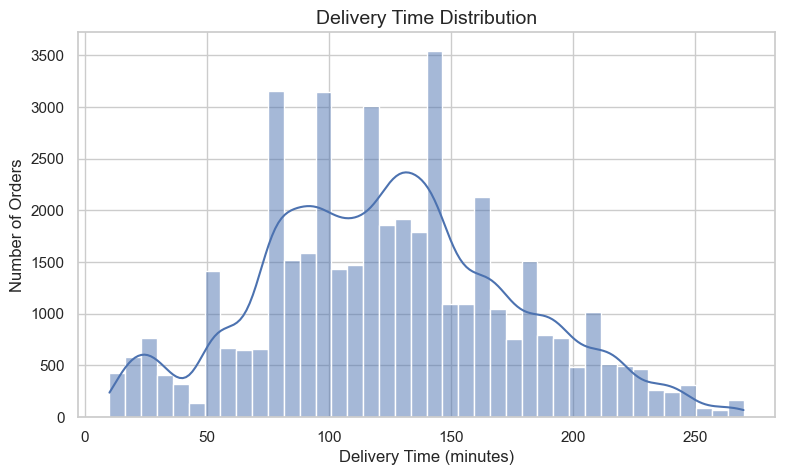

In [6]:
# Delivery Time Distributuion
plt.figure(figsize=(9,5))
sns.histplot(df["Delivery_Time"], bins=40,kde=True, color="#4C72B0")
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.show()

# Report:

# Right skewed

# Long tail deliveries exist



In [7]:
df.corr(numeric_only=True)["Delivery_Time"].sort_values(ascending=False)


Delivery_Time      1.000000
Agent_Age          0.254618
Store_Latitude     0.017009
Drop_Latitude      0.016928
Drop_Longitude     0.011523
Store_Longitude    0.011173
Agent_Rating      -0.289984
Name: Delivery_Time, dtype: float64

##  Delivery Time by Traffic Level

- Low traffic shows the lowest median delivery time (~100 minutes).

- Medium and High traffic increase delivery times noticeably.

- Traffic jams have the highest median (~150 minutes) and widest spread.

- Several high outliers appear in High/Jam traffic.

**Insight**: Traffic is a strong driver of delivery duration, especially under jam conditions.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9740\3712726947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Traffic", y="Delivery_Time", data=df,palette="Set3")


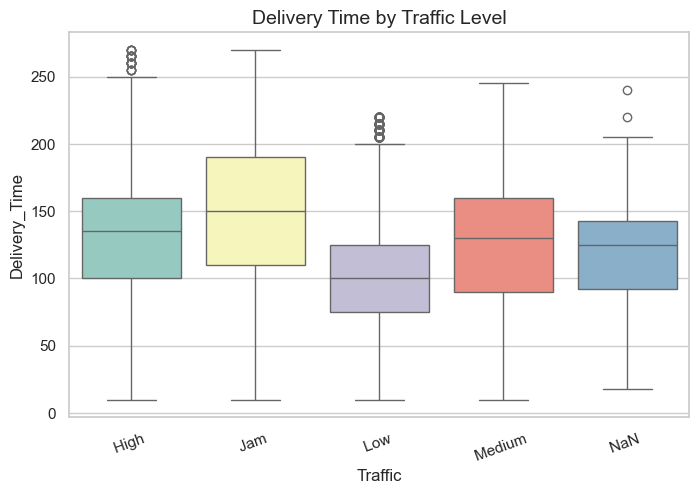

In [8]:
# Delivery Time by Traffic Level
plt.figure(figsize=(8,5))
sns.boxplot(x="Traffic", y="Delivery_Time", data=df,palette="Set3")
plt.title("Delivery Time by Traffic Level")
plt.xticks(rotation=20)
plt.show()





## Delivery Time by Weather Condition

- Sunny weather has the lowest median delivery time.

- Cloudy and Foggy conditions show higher medians and larger variability.

- Stormy and Sandstorms also increase delivery time dispersion.

- All adverse weather types show more extreme outliers.

**Insight**: Poor weather increases both average delivery time and uncertainty.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9740\4077080947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Weather", y="Delivery_Time", data=df,palette="Pastel1")


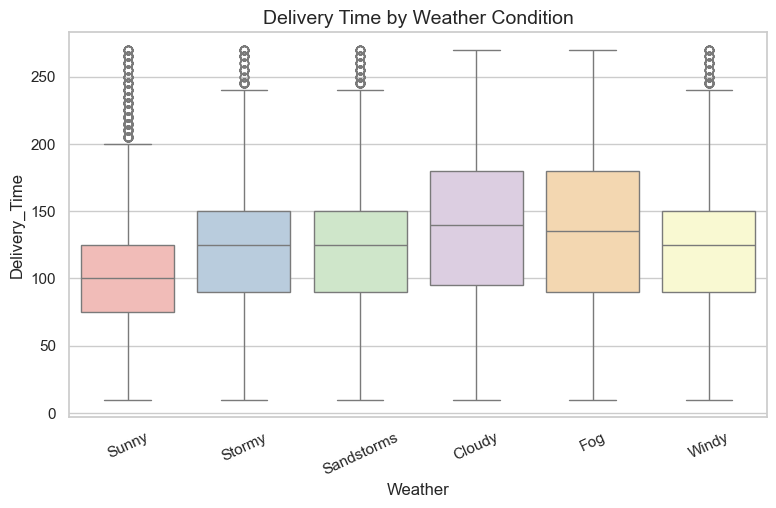

In [9]:
# Delivery Time by Weather Condition
plt.figure(figsize=(9,5))
sns.boxplot(x="Weather", y="Delivery_Time", data=df,palette="Pastel1")
plt.title("Delivery Time by Weather Condition")
plt.xticks(rotation=25)
plt.show()


## Average Delivery Time by Vehicle Type

- Scooters and vans have the lowest average delivery times (~115–117 minutes).

- Motorcycles and bicycles are slower on average.

- Bicycles show the highest variability, likely due to speed limitations and route constraints.

**Insight**: Vehicle type impacts delivery speed, with scooters/vans performing best.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9740\931979552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Vehicle", y="Delivery_Time", data=df,palette="Set2")


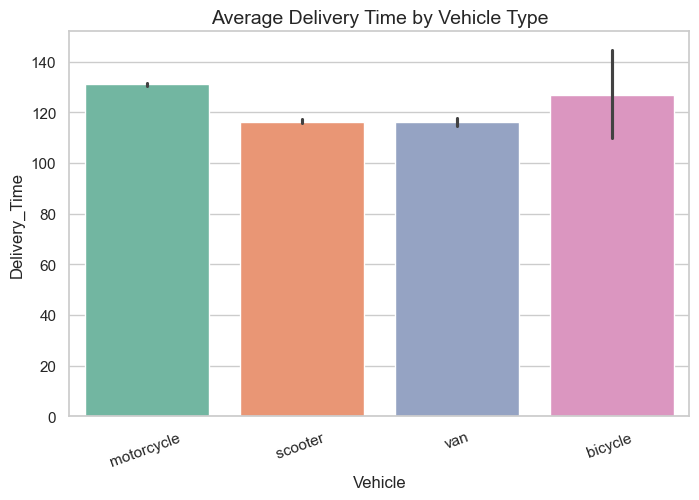

In [10]:
#  Vehicle Type
plt.figure(figsize=(8,5))
sns.barplot(x="Vehicle", y="Delivery_Time", data=df,palette="Set2")
plt.title("Average Delivery Time by Vehicle Type")
plt.xticks(rotation=20)
plt.show()

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [13]:
# numeric → median
# Numeric
df["Agent_Rating"] = df["Agent_Rating"].fillna(df["Agent_Rating"].median())

# Categorical
df["Weather"] = df["Weather"].fillna(df["Weather"].mode()[0])


In [14]:
df.isnull().sum()


Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

In [15]:
df["Delivery_Time_raw"] = df["Delivery_Time"]
q99 = df["Delivery_Time"].quantile(0.99)
df["Delivery_Time"] = df["Delivery_Time"].clip(upper=q99)


In [16]:
print("Before:", df["Delivery_Time_raw"].max())
print("After :", df["Delivery_Time"].max())


Before: 270
After : 245


## Before vs After Outlier Capping

- **Before** clipping, delivery time shows a heavy right tail (>250 minutes).

- **After** applying 99th percentile capping:

- Extreme values are reduced

- Distribution becomes smoother

- Model training becomes more stable

**Insight**: Outlier capping reduces the influence of extreme delays while preserving overall distribution.

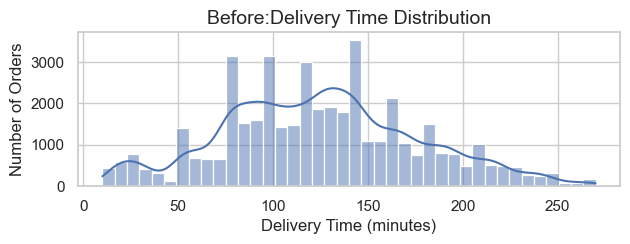

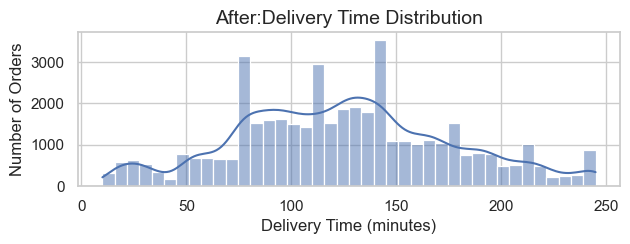

In [17]:
plt.figure(figsize=(7,2))
sns.histplot(df["Delivery_Time_raw"], bins=40,kde=True, color="#4C72B0")
plt.title("Before:Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.show()
plt.figure(figsize=(7,2))
sns.histplot(df["Delivery_Time"], bins=40,kde=True, color="#4C72B0")
plt.title("After:Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.show()

In [18]:
df["Order_Time"].isna().sum()


np.int64(0)

In [19]:
import numpy as np

df["Order_Time"] = df["Order_Time"].replace("NaN", np.nan)


In [20]:
df["Order_Time"].isna().sum()


np.int64(0)

In [21]:
df["Order_Time"].unique()[:20]


array(['11:30:00', '19:45:00', '08:30:00', '18:00:00', '13:30:00',
       '21:20:00', '19:15:00', '17:25:00', '20:55:00', '21:55:00',
       '14:55:00', '17:30:00', '09:20:00', '19:50:00', '20:25:00',
       '20:30:00', '20:40:00', '21:15:00', '20:20:00', '22:30:00'],
      dtype=object)

In [22]:
df["Order_Date"].isna().sum()


np.int64(0)

# Feature Engineering

In [23]:
df["Order_Date"].unique()[:20]


array(['2022-03-19', '2022-03-25', '2022-04-05', '2022-03-26',
       '2022-03-11', '2022-03-04', '2022-03-14', '2022-03-20',
       '2022-02-12', '2022-02-13', '2022-02-14', '2022-04-02',
       '2022-03-01', '2022-03-16', '2022-02-15', '2022-03-10',
       '2022-03-27', '2022-03-12', '2022-04-01', '2022-03-05'],
      dtype=object)

In [24]:
df["Order_DateTime"] = pd.to_datetime(
    df[["Order_Date", "Order_Time"]].astype(str).agg(" ".join, axis=1),
    errors="coerce"
)


In [25]:
df["Order_DateTime"].isna().sum()


np.int64(91)

In [26]:
df["Order_DateTime"].isna().sum()
# → 91


np.int64(91)

In [27]:
df["Order_DateTime"] = df["Order_DateTime"].fillna(df["Order_DateTime"].mode()[0])


In [28]:
df["hour"] = df["Order_DateTime"].dt.hour
df["dayofweek"] = df["Order_DateTime"].dt.dayofweek
df["is_weekend"] = (df["dayofweek"] >= 5).astype(int)


## Geo distance 

In [29]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

df["distance_km"] = df.apply(
    lambda x: haversine(x["Store_Latitude"], x["Store_Longitude"],
                        x["Drop_Latitude"], x["Drop_Longitude"]), axis=1)


## Encode categorical variables

In [30]:
df = pd.get_dummies(df, columns=["Traffic","Weather","Vehicle","Area","Category"], drop_first=True)


In [31]:

# Pickup_Time occurs after order placement and directly reflects delivery progress,
# so including it would leak future information into the model. 
# It was removed to prevent target leakage.
df = df.drop(columns=["Pickup_Time"])


In [32]:
df = df.drop(columns=["Order_ID","Order_Date", "Order_Time", "Order_DateTime"])
# Order_ID was removed as it is a unique identifier and contains no predictive information.
# Raw date and time columns were removed after extracting 



In [33]:
df = df.drop(columns=[
    "Store_Latitude", "Store_Longitude",
    "Drop_Latitude", "Drop_Longitude"
])
# Raw latitude and longitude features were removed after computing Haversine distance, 
# retaining a single interpretable geo-distance feature to reduce dimensionality 
# and improve generalization.



In [34]:
df = df.drop(columns=["Traffic_NaN "])

In [35]:
df.columns

Index(['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'Delivery_Time_raw',
       'hour', 'dayofweek', 'is_weekend', 'distance_km', 'Traffic_Jam ',
       'Traffic_Low ', 'Traffic_Medium ', 'Weather_Fog', 'Weather_Sandstorms',
       'Weather_Stormy', 'Weather_Sunny', 'Weather_Windy',
       'Vehicle_motorcycle ', 'Vehicle_scooter ', 'Vehicle_van', 'Area_Other',
       'Area_Semi-Urban ', 'Area_Urban ', 'Category_Books',
       'Category_Clothing', 'Category_Cosmetics', 'Category_Electronics',
       'Category_Grocery', 'Category_Home', 'Category_Jewelry',
       'Category_Kitchen', 'Category_Outdoors', 'Category_Pet Supplies',
       'Category_Shoes', 'Category_Skincare', 'Category_Snacks',
       'Category_Sports', 'Category_Toys'],
      dtype='object')

## Regression

In [36]:
X = df.drop(columns=["Delivery_Time", "Delivery_Time_raw"])
y = df["Delivery_Time"]


In [37]:
X.shape, y.shape


((43739, 35), (43739,))

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


##  Task A — Regression

In [39]:
#  Baseline Regression 

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

baseline_pred = np.full(len(y_val), y_train.mean())

mae_base = mean_absolute_error(y_val, baseline_pred)
rmse_base = np.sqrt(mean_squared_error(y_val, baseline_pred))

print("Baseline MAE:", mae_base)
print("Baseline RMSE:", rmse_base)


Baseline MAE: 41.10567820973548
Baseline RMSE: 51.326415071578595


In [40]:
# Train ML Model (Random Forest)
from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(
#     n_estimators=150,
#     random_state=42,
#     n_jobs=1
# )

rf = RandomForestRegressor(
    n_estimators=300,        # more trees = stability
    max_depth=15,           # limit tree depth (reduces overfitting)
    min_samples_leaf=5,     # smoother predictions
    max_features="sqrt",    # feature subsampling
    random_state=42,
    n_jobs=1
)


rf.fit(X_train, y_train)

pred = rf.predict(X_val)

mae = mean_absolute_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))


print("RF MAE:", mae)
print("RF RMSE:", rmse)


RF MAE: 19.163289260519015
RF RMSE: 24.183847458172437


In [41]:
import pandas as pd

regression_metrics=pd.DataFrame({
    "Model": ["Baseline", "Random Forest"],
    "MAE": [mae_base, mae],
    "RMSE": [rmse_base, rmse]
})
regression_metrics

,Model,MAE,RMSE
0,Baseline,41.105678,51.326415
1,Random Forest,19.163289,24.183847


## Learning Curves

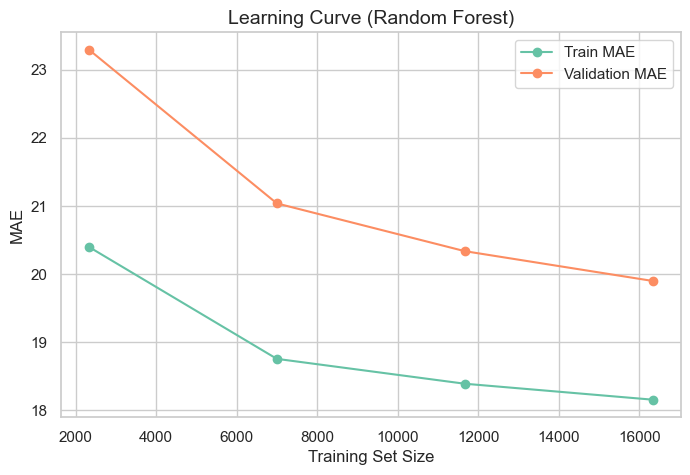

In [42]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    rf,
    X_train, y_train,
    scoring="neg_mean_absolute_error",
    train_sizes=[0.1, 0.3, 0.5, 0.7],   # fewer points
    cv=3,                              # fewer folds
    n_jobs=1
)

train_mae = -train_scores.mean(axis=1)
val_mae = -val_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mae, marker="o", label="Train MAE")
plt.plot(train_sizes, val_mae, marker="o", label="Validation MAE")
plt.xlabel("Training Set Size")
plt.ylabel("MAE")
plt.title("Learning Curve (Random Forest)")
plt.legend()
plt.show()


## Error Analysis

In [43]:
# Create Error Column
df_val = X_val.copy()
df_val["y_true"] = y_val.values
df_val["y_pred"] = pred
df_val["error"] = df_val["y_pred"] - df_val["y_true"]
df_val["abs_error"] = df_val["error"].abs()


##  Error vs True Delivery Time (Scatter Plots)

- For short deliveries (<50 minutes), errors are small and mostly positive, meaning the model slightly over-predicts very fast deliveries.

- For medium deliveries (50–150 minutes), predictions are centered closer to zero with moderate spread, indicating relatively good accuracy.

- For long deliveries (>170 minutes), errors become strongly negative, showing consistent under-prediction of extreme delays.

- **Interpretation**:
The model tends to overestimate very fast deliveries and underestimate very slow deliveries, a common regression effect where predictions are pulled toward the mean.

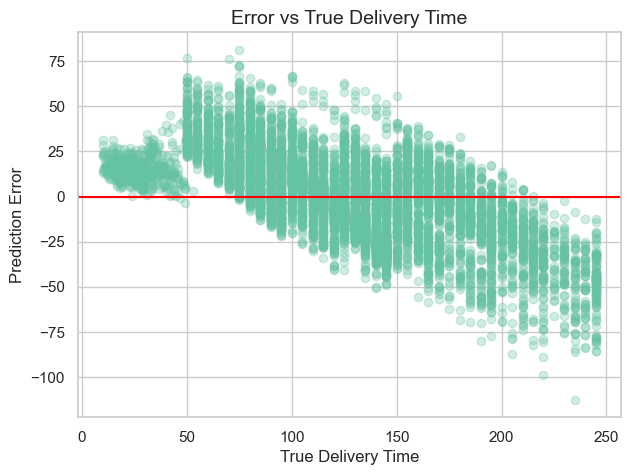

In [44]:
plt.figure(figsize=(7,5))
plt.scatter(df_val["y_true"], df_val["error"], alpha=0.3)
plt.axhline(0, color="red")
plt.xlabel("True Delivery Time")
plt.ylabel("Prediction Error")
plt.title("Error vs True Delivery Time")
plt.show()


## Mean Absolute Error Error by Traffic Level

- From your bar plot:

- Low traffic → lowest error (~16 min)

- Medium traffic → higher error (~20 min)

- Traffic jams → highest error (~21 min)

**Interpretation**:
Prediction errors increase with traffic severity. The model struggles most during traffic jams, likely due to higher variability and unpredictable congestion effects.

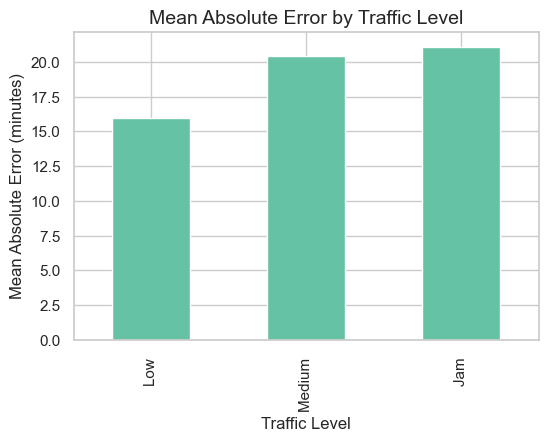

In [45]:
# Mean Absolute Error by Traffic Level
traffic_cols = [c for c in X_val.columns if c.startswith("Traffic_")]

df_val["Traffic"] = (
    X_val[traffic_cols]
    .idxmax(axis=1)
    .str.replace("Traffic_", "")
)

df_val.groupby("Traffic")["abs_error"].mean()

traffic_error = df_val.groupby("Traffic")["abs_error"].mean().sort_values()

plt.figure(figsize=(6,4))
traffic_error.plot(kind="bar")
plt.xlabel("Traffic Level")
plt.ylabel("Mean Absolute Error (minutes)")
plt.title("Mean Absolute Error by Traffic Level")
plt.show()


## Mean Absolute Error by Weather Condition

- From your weather plot:

- Errors are lowest in sandstorms / windy conditions (slightly)

- Errors increase for sunny → stormy → foggy

- Fog shows the highest error (~20 min)

**Interpretation**:
Adverse weather (especially fog and storms) leads to higher prediction error, suggesting the model finds it harder to estimate delivery times under poor visibility and unstable conditions.

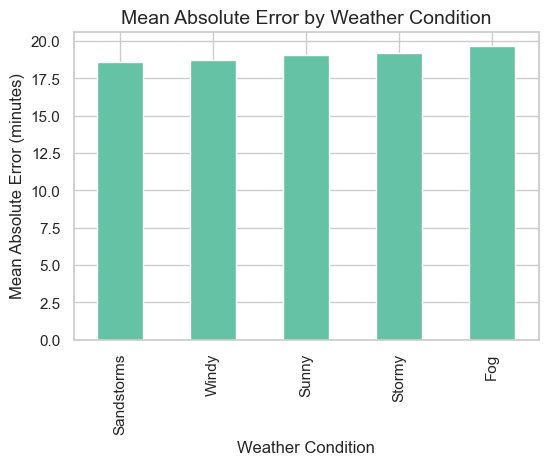

In [46]:
# Mean Absolute Error by Weather Condition

weather_cols = [c for c in X_val.columns if c.startswith("Weather_")]

# Reconstruct Weather label
df_val["Weather"] = (
    X_val[weather_cols]
    .idxmax(axis=1)
    .str.replace("Weather_", "")
)

# Mean absolute error by weather
weather_error=df_val.groupby("Weather")["abs_error"].mean().sort_values()

plt.figure(figsize=(6,4))
weather_error.plot(kind="bar")
plt.xlabel("Weather Condition")
plt.ylabel("Mean Absolute Error (minutes)")
plt.title("Mean Absolute Error by Weather Condition")
plt.show()

# Task B:Delay Risk Classification

In [47]:
# Creating Label
# Used raw delivery time for labeling
threshold = df["Delivery_Time_raw"].quantile(0.75)

print("Late threshold:", threshold)

df["late"] = (df["Delivery_Time_raw"] > threshold).astype(int)


Late threshold: 160.0


## Justification
- Late deliveries were defined as orders taking longer than the 75th percentile of delivery time (160 minutes), which corresponds to the slowest 25% of deliveries. This data-driven threshold reflects the natural distribution of the dataset and avoids using an arbitrary fixed cutoff, while also keeping the classes reasonably balanced.

In [48]:
X_cls = df.drop(columns=["Delivery_Time", "Delivery_Time_raw", "late"])
y_cls = df["late"]


In [49]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_val, yc_train, yc_val = train_test_split(
    X_cls, y_cls,
    test_size=0.2,
    random_state=42,
    stratify=y_cls
)


In [50]:
baseline_prob = np.full(len(yc_val), yc_train.mean())

from sklearn.metrics import roc_auc_score, average_precision_score
roc_auc_base=roc_auc_score(yc_val, baseline_prob)
avg_precision_base=average_precision_score(yc_val, baseline_prob)
print("Baseline ROC AUC:",roc_auc_base)
print("Baseline PR AUC:",avg_precision_base)


Baseline ROC AUC: 0.5
Baseline PR AUC: 0.23056698673982626


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

rf_cls = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=1
)

rf_cls.fit(Xc_train, yc_train)

probs = rf_cls.predict_proba(Xc_val)[:, 1]
roc_auc=roc_auc_score(yc_val, probs)
avg_precision=average_precision_score(yc_val, probs)
print("RF ROC AUC:", roc_auc)
print("RF PR AUC:", avg_precision)


RF ROC AUC: 0.9568454940316772
RF PR AUC: 0.8589012389731261


In [52]:
import pandas as pd

classification_metrics = pd.DataFrame({
    "Model": ["Baseline", "Random Forest"],
    "ROC-AUC": [roc_auc_base, roc_auc],
    "PR-AUC": [avg_precision_base, avg_precision]
})

classification_metrics


,Model,ROC-AUC,PR-AUC
0,Baseline,0.500000,0.230567
1,Random Forest,0.956845,0.858901


In [53]:
# Operating Threshold
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(yc_val, probs)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)

best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)

# Evaluate at this threshold
pred_cls = (probs >= best_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(yc_val, pred_cls))


Best threshold: 0.33738087544237216
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6731
           1       0.78      0.85      0.81      2017

    accuracy                           0.91      8748
   macro avg       0.87      0.89      0.88      8748
weighted avg       0.91      0.91      0.91      8748



## Used a split strategy for Regression and Classification and Why?
- For Regression a random train–validation split (80/20) with a fixed seed was used for evaluation. This approach is appropriate since individual deliveries are independent and the dataset does not exhibit strong temporal dependencies.
- Stratified sampling was applied for classification to preserve the late-delivery class distribution. A fixed random seed ensures reproducibility.
expalin in simple

### Why Picked an operating threshold for f1?
- The operating threshold was selected by maximizing the F1-score on the validation set, resulting in a threshold of 0.34. F1 was chosen to balance precision and recall, ensuring that most late deliveries are detected while limiting false alarms. At this threshold, the model achieves 78% precision and 85% recall on late deliveries, providing a strong tradeoff between catching delays and avoiding unnecessary alerts.

### A short note on what I changed.
- Based on learning curves and error analysis, several improvements were applied. 
- Temporal features (hour, day of week, weekend flag) and geographic distance were engineered to better capture delivery patterns.
- Extreme delivery times were capped at the 99th percentile to reduce the impact of outliers.
- For Random Forest, tree depth and minimum leaf size were tuned to limit overfitting and improve generalization.
- These adjustments reduced validation error and narrowed the train–validation gap.

## Monitoring Plan

- In production, model performance would be monitored using ETA MAE and delay-risk PR-AUC. 
- Key input features such as traffic, weather, delivery distance, and order time would be tracked to detect data drift.

- Sudden changes in traffic congestion, average distance, or bad weather frequency would trigger alerts. 
- Predicted delay probabilities would also be monitored for shifts.
- Actual delivery outcomes would be regularly compared with predictions, and the model would be retrained if performance drops.

## Saving Trained Model

In [54]:
import joblib

joblib.dump(rf, "rf_model.pkl")
joblib.dump(rf_cls, "rf_classifier.pkl")


['rf_classifier.pkl']